<a href="https://colab.research.google.com/github/MouliChintakunta-AI/DLTutors/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelBinarizer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
import matplotlib.colors
import tqdm
from tqdm import tqdm_notebook
from sklearn.datasets import make_circles, make_moons

In [ ]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x,self.w.T) + self.b

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(np.float128(-x)))

  def grad_b_mse(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * (y_pred) * (1- y_pred)

  def grad_dw_mse(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * (y_pred) * (1- y_pred) * x
  def grad_dw_ce(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * x
  def grad_b_ce(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return y_pred - y

  def fit(self,X,Y,epochs = 100, learning_rate = 1, init=False,display_loss = False):
    #initialisation of w,b
    if init:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0
      if display_loss:
        loss = {}
    for i in tqdm_notebook(range(epochs),desc= "Training SN",unit = "epoch"):
      dw, db = 0,0
      for x,y in zip(X,Y):
        dw += self.grad_dw_ce(x,y)
        db += self.grad_b_ce(x,y)
      m = X.shape[1]
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      if display_loss:
        y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(y_pred,Y)
    if display_loss:
      print(loss.values())
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      val = self.sigmoid(self.perceptron(x))
      Y_pred.append(val)
    return np.array(Y_pred)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors = ['red','yellow','green'])

In [ ]:
data , labels = make_blobs(n_samples = 1000,centers = 4,random_state = 0,n_features = 2)

In [ ]:
data.shape

(1000, 2)

In [ ]:
labels.shape

(1000,)

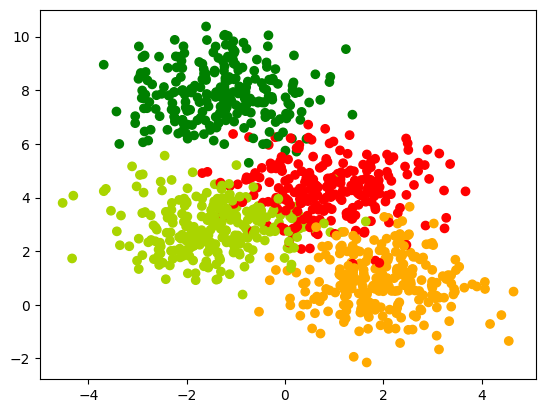

In [ ]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap)
plt.show()

In [ ]:
labels_org = labels
labels = np.mod(labels,2)

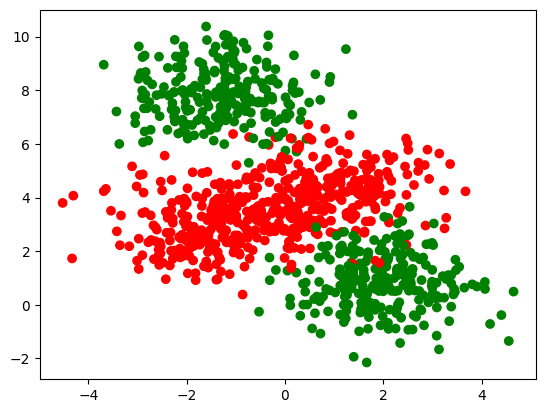

In [ ]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap)
plt.show()

In [ ]:
X_train,X_val, Y_train,Y_val = train_test_split(data,labels,stratify = labels,random_state = 0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


<ipython-input-2-8db7fd78c405>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),desc= "Training SN",unit = "epoch"):


Training SN:   0%|          | 0/1000 [00:00<?, ?epoch/s]

dict_values([0.5776857074101734785, 0.48854226156753507608, 0.53160245009836474926, 0.33358441926268745395, 0.5572288517063880931, 0.47821576759702835792, 0.531368624611132845, 0.33755241972147421935, 0.46642295735922953518, 0.5262474010633635783, 0.39910753988944853228, 0.5267240886371723592, 0.3357305620808582329, 0.53898204721315044275, 0.3775295227784387453, 0.55652027443349856144, 0.4158379708078707342, 0.550721747333329264, 0.3771012232243072969, 0.5778106421404839077, 0.47271851969620824093, 0.51678784178172482627, 0.4196123663185209424, 0.5244890286733954878, 0.36021082357442789378, 0.53892863004003903327, 0.40157467032195569046, 0.5482189905584679922, 0.42219758033472182674, 0.54814509121036329405, 0.44843399765182144723, 0.55824302051012732786, 0.46367384955448259014, 0.53935540386176870404, 0.42723822900268690998, 0.54480670970028368045, 0.47177163401431875493, 0.5281647067916177329, 0.409328350392530056, 0.54080991643729430635, 0.43790066027936836024, 0.54586456363216920675

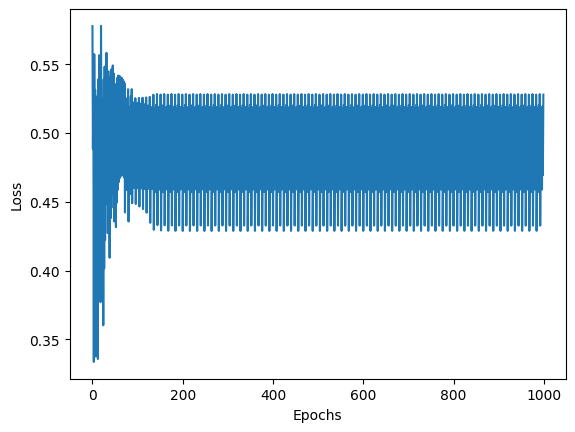

In [ ]:
sn = SigmoidNeuron()
sn.fit(X_train,Y_train,1000,0.05,True,True)

In [ ]:
_threshold = 0.5
y_train_pred = sn.predict(X_train)
Y_train_norm = (y_train_pred > _threshold).astype("int").ravel()
y_pred = sn.predict(X_val)
Y_pred_norm = (y_pred > _threshold).astype("int").ravel()
train_accuracy = accuracy_score(Y_train,Y_train_norm)
test_accuracy = accuracy_score(Y_val,Y_pred_norm)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.4706666666666667
Testing Accuracy: 0.456


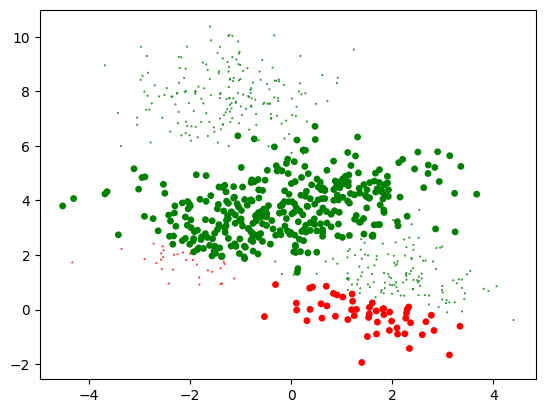

In [ ]:
plt.scatter( X_train[:,0],X_train[:,1],c = Y_train_norm,cmap = my_cmap, s= 15 * np.abs(Y_train_norm - Y_train) + .2)
plt.show()

In [ ]:
class FirstFeedForwardNetwork:
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.multiclass = False

  def sigmoid(self,x):
    return 1.0 / (1.0 + np.exp(-x))
  def softmax(self,x):
    pass #softmax
  def forwardpass(self,x):
    self.x1 , self.x2 = x
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    if self.multiclass:
      pass # write code here to return softmax relevant output
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forwardpass(x)
    self.dw5 = (self.h3 - y) * self.h3 * (1- self.h3) * self.h1
    self.dw6 = (self.h3 - y) * self.h3 * (1- self.h3) * self.h2
    self.db3 = (self.h3 - y) * self.h3 * (1- self.h3)
    self.dw1 = (self.h3 - y) * self.h3 * (1- self.h3) * self.w5 * self.h1 * ( 1- self.h1) * self.x1
    self.dw2 = (self.h3 - y) * self.h3 * (1- self.h3) * self.w5 * self.h1 * ( 1- self.h1) * self.x2
    self.db1 = (self.h3 - y) * self.h3 * (1- self.h3) * self.w5 * self.h1 * ( 1- self.h1)

    self.dw3 = (self.h3 - y) * self.h3 * (1- self.h3) * self.w5 * self.h2 * ( 1- self.h2) * self.x1
    self.dw4 = (self.h3 - y) * self.h3 * (1- self.h3) * self.w5 * self.h2 * ( 1- self.h2) * self.x2
    self.db2 = (self.h3 - y) * self.h3 * (1- self.h3) * self.w5 * self.h2 * ( 1- self.h2)

  def fit(self, X, Y, epochs = 100, learning_rate = 1,init = False, display_loss = False):

    if init:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
    if display_loss:
      loss = {}
    for i in tqdm_notebook(range(epochs),desc = "Training FNN", unit = "epoch"):
      dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0] * 9
      for x, y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
      m = X.shape[1]
      self.w1 -= learning_rate * dw1  / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      if display_loss:
        val = self.predict(X).ravel()
        loss[i] = log_loss(Y,val)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("epochs")
      plt.ylabel("Loss")
      plt.show()

  def predict(self,X):
    y_pred = []
    for x in X:
      pred = self.forwardpass(x)
      y_pred.append(pred)
    return np.array(y_pred)

<ipython-input-18-a3aad623c530>:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),desc = "Training FNN", unit = "epoch"):


Training FNN:   0%|          | 0/2000 [00:00<?, ?epoch/s]

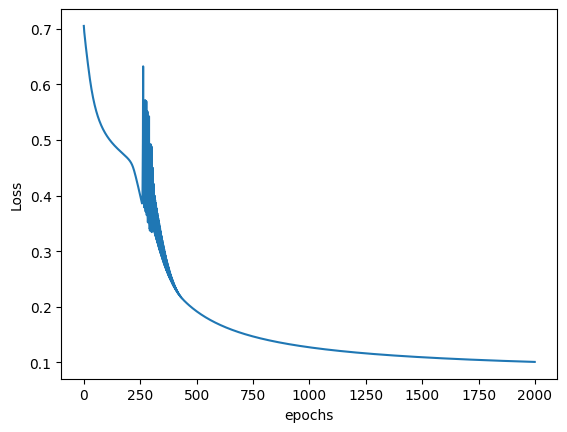

In [ ]:
ffn = FirstFeedForwardNetwork()
ffn.fit(X_train,Y_train,2000,0.01,True,True)

In [ ]:
_threshold = 0.5
y_train_pred = ffn.predict(X_train)
Y_train_norm = (y_train_pred > _threshold).astype("int").ravel()
y_pred = ffn.predict(X_val)
Y_pred_norm = (y_pred > _threshold).astype("int").ravel()
train_accuracy = accuracy_score(Y_train,Y_train_norm)
test_accuracy = accuracy_score(Y_val,Y_pred_norm)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.976
Testing Accuracy: 0.94


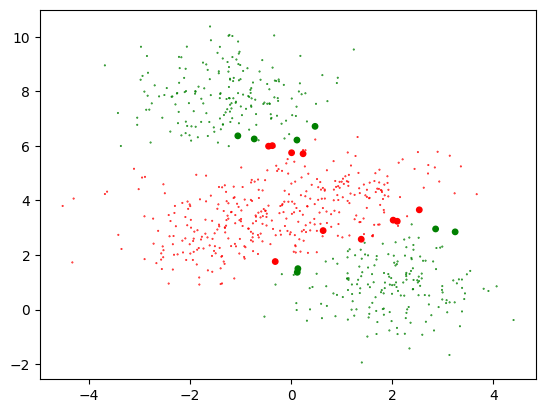

In [ ]:
plt.scatter( X_train[:,0],X_train[:,1],c = Y_train_norm,cmap = my_cmap, s= 15 * np.abs(Y_train_norm - Y_train) + .2)
plt.show()

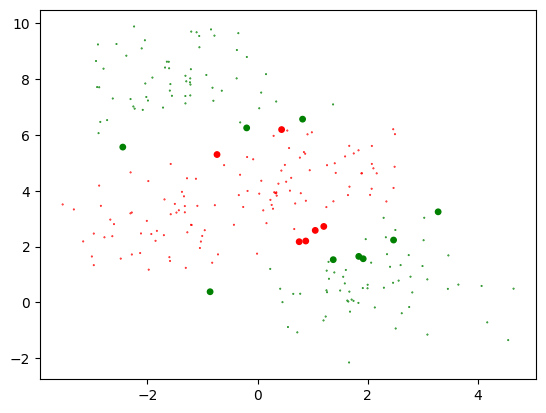

In [ ]:
plt.scatter( X_val[:,0],X_val[:,1],c = Y_pred_norm,cmap = my_cmap, s= 15 * np.abs(Y_pred_norm - Y_val) + .2)
plt.show()

#Generic Feedforward Network

In [ ]:
class GenericFeedForwardNetworkOne:

  def __init__(self,n_inputs=2,n_outputs=1,hidden = [3,2]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden)
    self.sizes = [n_inputs] + hidden + [n_outputs] #[ 2 3 2 1]
    print(self.sizes)
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
      self.B[i+1] = np.zeros((1,self.sizes[i+1]))

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self,x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1): #[ 2 3 2 1]
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]

  def grad_sigmoid(self,x):
    #y_pred = self.forward_pass(x)
    return x * (1-x)

  def grad(self,x,y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

  def fit(self,X,Y,epochs = 1000, learning_rate = 0.01, initialise = False, display_loss= False):

    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
        self.B[i+1] = np.zeros((1,self.sizes[i+1]))

    if display_loss:
      loss = {}

    for epoch in tqdm_notebook(range(epochs),desc = " Training Generic FFN" , unit = 'epoch'):
      dw = {}
      db = {}

      for i in range(self.nh+1):
        dw[i+1] = np.zeros((self.sizes[i],self.sizes[i+1]))
        db[i+1] = np.zeros((1,self.sizes[i+1]))

      for x,y in zip(X,Y):
        self.grad(x,y)
        for i in range(self.nh+1):
          dw[i+1] += self.dW[i+1]
          db[i+1] += self.dB[i+1]

      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dw[i+1] / m
        self.B[i+1] -= learning_rate * db[i+1] / m

      if display_loss:
        pred = self.predict(X)
        #print(pred)
        loss[epoch] = mean_squared_error(pred,Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("epochs")
      plt.ylabel("Loss")
      plt.show()

  def predict(self,X):
    Y = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y.append(y_pred)
    return np.array(Y).squeeze()


[2, 2, 3, 1]


<ipython-input-23-d807448dc8c4>:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc = " Training Generic FFN" , unit = 'epoch'):


 Training Generic FFN:   0%|          | 0/1000 [00:00<?, ?epoch/s]

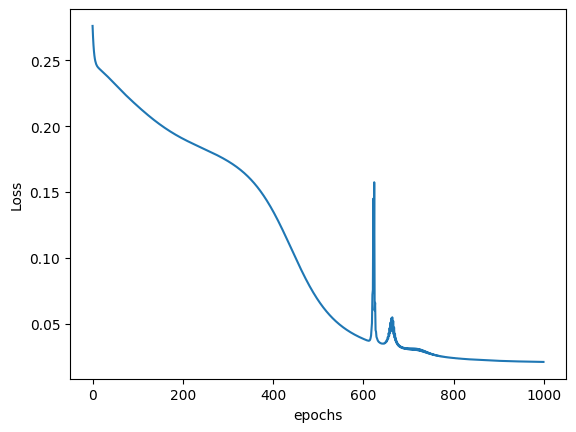

In [ ]:
gffn = GenericFeedForwardNetworkOne(2,1,[2,3,2])
gffn.fit(X_train,Y_train,1000,0.001,True,True)

In [ ]:
_threshold = 0.5
y_train_pred = gffn.predict(X_train)
Y_train_norm = (y_train_pred > _threshold).astype("int").ravel()
y_pred = gffn.predict(X_val)
Y_pred_norm = (y_pred > _threshold).astype("int").ravel()
train_accuracy = accuracy_score(Y_train,Y_train_norm)
test_accuracy = accuracy_score(Y_val,Y_pred_norm)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.9746666666666667
Testing Accuracy: 0.94


# Generic Feed forward Network class

In [ ]:
class GenericFFNW:
  def __init__(self,n_inputs,n_outputs,n_hidden_layers):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(n_hidden_layers)
    self.sizes = [self.nx] + n_hidden_layers + [self.ny] # { prepending input and appending output to hidden layers [2 3 1]}
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1,self.sizes[i+1]))

  def sigmoid(self,x):
    return 1.0 / ( 1.0 + np.exp(-x))

  def forward_pass(self,x):
    self.H = {}
    self.A = {}
    self.H[0] = x.reshape(1,-1)
    for i in range (self.nh+1):
      self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]

  def grad(self,x,y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

  def grad_sigmoid(self,x):
    return x * (1-x)

  def fit(self,X, Y,epochs = 1000,learning_rate = 0.01,initialise = False, display_loss = False, batch_size = 100):
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1,self.sizes[i+1]))
    if display_loss:
      loss = {}
    for epoch in tqdm_notebook(range(epochs),desc = "Training FFN", unit = 'epoch'):
      #initialise dw,db
      dw = {}
      db = {}
      for i in range(self.nh+1):
        dw[i+1] = np.zeros((self.sizes[i],self.sizes[i+1]))
        db[i+1] = np.zeros((1,self.sizes[i+1]))
      #initialise loss if display_loss is true

      for x,y in zip(X,Y):
        self.grad(x,y)
        for i in range(self.nh+1):
          dw[i+1] += self.dW[i+1]
          db[i+1] += self.dB[i+1]
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dw[i+1] / m
        self.B[i+1] -= learning_rate * db[i+1] / m
      if display_loss:
        loss[epoch] = log_loss(Y,self.predict(X))
    if display_loss:
      #print(loss.values())
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Log_loss")
      plt.show()

  def predict(self,X):
    Y = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y.append(y_pred)
    return np.array(Y).squeeze()

<ipython-input-43-379395ee5b74>:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc = "Training FFN", unit = 'epoch'):


Training FFN:   0%|          | 0/1000 [00:00<?, ?epoch/s]

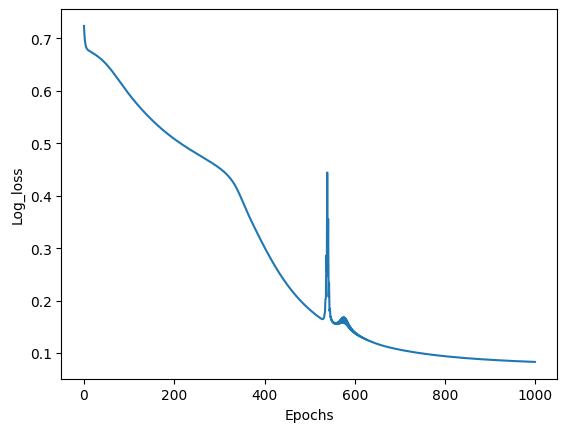

In [ ]:
ffn = GenericFFNW(2,1,[2,3])
ffn.fit(X_train,Y_train,1000,0.001,True,True)

In [ ]:
_threshold = 0.5
y_train_pred = ffn.predict(X_train)
Y_train_norm = (y_train_pred > _threshold).astype("int").ravel()
y_pred = ffn.predict(X_val)
Y_pred_norm = (y_pred > _threshold).astype("int").ravel()
train_accuracy = accuracy_score(Y_train,Y_train_norm)
test_accuracy = accuracy_score(Y_val,Y_pred_norm)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.9742857142857143
Testing Accuracy: 0.94


In [ ]:
labels = labels_org
X_train, X_test, Y_train,Y_test = train_test_split(data,labels_org,stratify = labels_org,random_state = 0,test_size= .2)
print(X_train.shape,X_test.shape,Y_train.shape)

(800, 2) (200, 2) (800,)


In [ ]:
lb = LabelBinarizer()
lb.fit(Y_train)
Y_train_lb = lb.transform(Y_train)
Y_test_lb = lb.transform(Y_test)
print(Y_train_lb.shape)

(800, 4)


<ipython-input-43-379395ee5b74>:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc = "Training FFN", unit = 'epoch'):


Training FFN:   0%|          | 0/2500 [00:00<?, ?epoch/s]

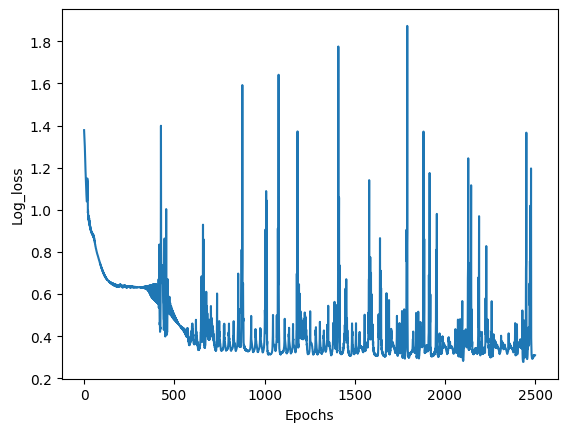

In [ ]:
mcffn = GenericFFNW(2,4,[2,3])
mcffn.fit(X_train,Y_train_lb,2500,0.006,display_loss = True)

In [ ]:
y_train_pred_org = mcffn.predict(X_train)
y_train_pred = np.argmax(y_train_pred_org,1)
print(y_train_pred)
y_test_pred_org = mcffn.predict(X_test)
y_test_pred = np.argmax(y_test_pred_org,1)

train_accuracy = accuracy_score(Y_train,y_train_pred)
test_accuracy = accuracy_score(Y_test,y_test_pred)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

[2 3 2 2 3 2 2 1 0 3 2 1 1 0 1 2 2 2 2 1 1 3 3 1 3 1 0 0 1 3 0 1 3 3 2 2 2
 2 2 3 2 3 2 0 3 0 0 2 0 1 2 1 0 3 1 1 1 3 2 3 3 2 2 0 2 1 2 2 1 1 3 2 3 2
 3 0 1 1 3 2 2 1 1 1 1 1 2 3 0 2 0 0 0 3 3 2 1 3 0 3 0 3 3 0 3 3 1 0 0 2 2
 3 3 0 1 3 1 3 1 3 2 1 1 1 1 2 0 2 3 0 3 3 2 2 3 1 3 2 2 2 3 1 3 3 3 3 1 0
 1 3 1 0 1 1 1 3 1 2 2 1 0 0 0 2 2 3 3 3 3 1 1 0 3 3 1 1 1 2 2 3 3 1 0 2 2
 0 0 2 2 0 0 2 0 2 1 2 2 3 2 1 3 1 1 0 1 0 0 1 0 1 3 0 0 0 0 3 1 0 2 3 1 2
 2 0 1 1 2 0 2 0 3 1 1 1 2 1 0 2 0 1 0 2 0 0 2 1 3 0 0 2 2 1 1 3 0 0 3 0 1
 1 1 0 3 1 2 2 2 2 3 1 1 2 3 0 3 1 3 1 2 1 2 2 2 2 1 1 3 0 3 1 2 2 1 2 0 0
 3 2 2 3 0 1 0 3 2 1 0 0 3 2 0 1 2 1 3 1 1 3 1 3 3 2 2 1 1 2 1 1 2 1 2 0 0
 2 2 2 2 0 0 1 3 1 1 2 1 2 2 0 0 1 3 2 3 2 3 3 2 0 1 1 0 2 2 1 1 1 3 2 3 1
 3 1 3 0 1 1 1 0 0 1 3 0 0 3 2 2 0 1 1 2 0 3 3 3 3 2 1 1 0 2 3 1 1 0 3 3 1
 1 3 2 1 2 2 3 3 2 0 0 1 2 3 2 2 2 3 1 3 2 2 1 0 3 2 3 3 2 0 2 3 3 0 3 3 2
 3 3 2 0 3 0 0 2 0 3 2 1 3 2 3 3 2 3 3 1 1 1 3 1 1 2 2 2 1 2 1 2 1 0 0 3 3
 3 1 1 0 1 1 1 2 1 2 3 2 

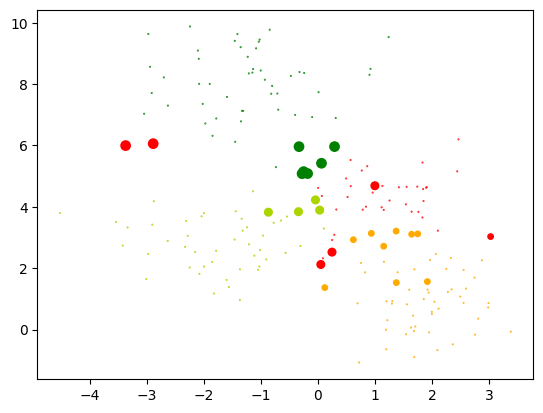

In [ ]:
plt.scatter( X_test[:,0],X_test[:,1],c = y_test_pred,cmap = my_cmap, s= 15 * np.abs(y_test_pred - Y_test) + .2)
plt.show()

In [ ]:
data, labels = make_circles(n_samples= 5000, noise = .23, random_state = 3,factor = .23)

In [ ]:
data.shape

(5000, 2)

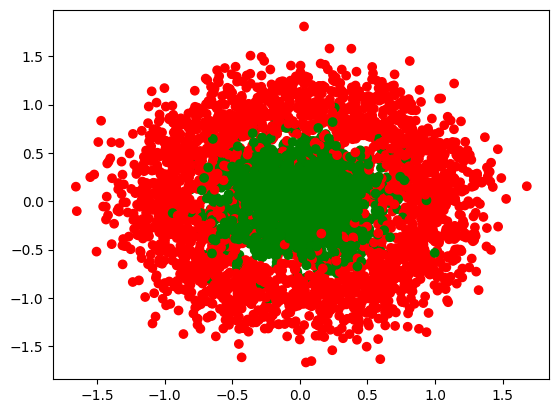

In [ ]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap)
plt.show()

In [ ]:
X_train,X_val,Y_train,Y_test = train_test_split(data,labels,stratify = labels,random_state = 2)
print(X_train.shape)
print(Y_train.shape)

(3750, 2)
(3750,)


<ipython-input-43-379395ee5b74>:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc = "Training FFN", unit = 'epoch'):


Training FFN:   0%|          | 0/1000 [00:00<?, ?epoch/s]

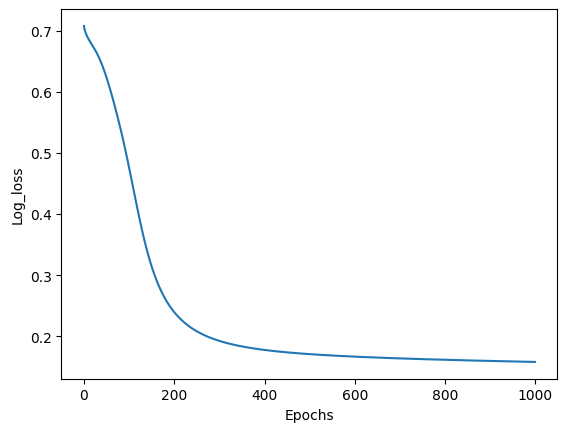

In [ ]:
snn = GenericFFNW(2,1,[5])
snn.fit(X_train,Y_train,1000,0.001,display_loss = True)

In [ ]:
_threshold = 0.5
y_train_pred = snn.predict(X_train)
Y_train_norm = (y_train_pred > _threshold).astype("int").ravel()
y_pred = snn.predict(X_val)
Y_pred_norm = (y_pred > _threshold).astype("int").ravel()
train_accuracy = accuracy_score(Y_train,Y_train_norm)
test_accuracy = accuracy_score(Y_test,Y_pred_norm)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.9354666666666667
Testing Accuracy: 0.9328


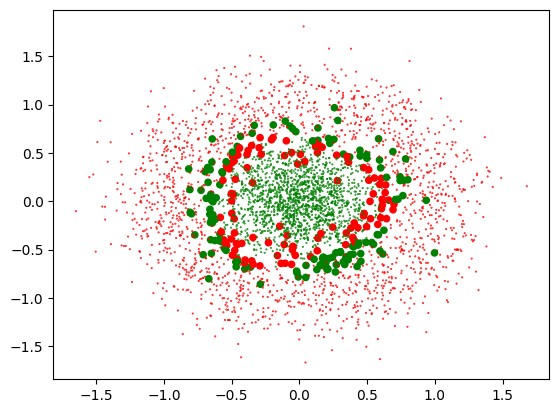

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c= Y_train,cmap= my_cmap, s = 20* np.abs(Y_train_norm - Y_train) + .2 )
plt.show()

In [ ]:
data,labels = make_moons(n_samples = 3000,noise= .3)
print(data.shape)

(3000, 2)


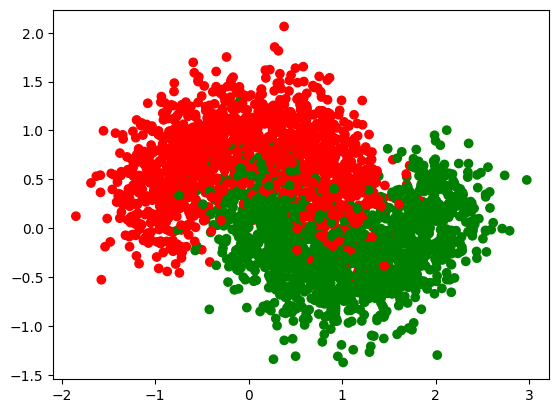

In [ ]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_val = train_test_split(data,labels,stratify= labels,random_state = 9)

<ipython-input-43-379395ee5b74>:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc = "Training FFN", unit = 'epoch'):


Training FFN:   0%|          | 0/1000 [00:00<?, ?epoch/s]

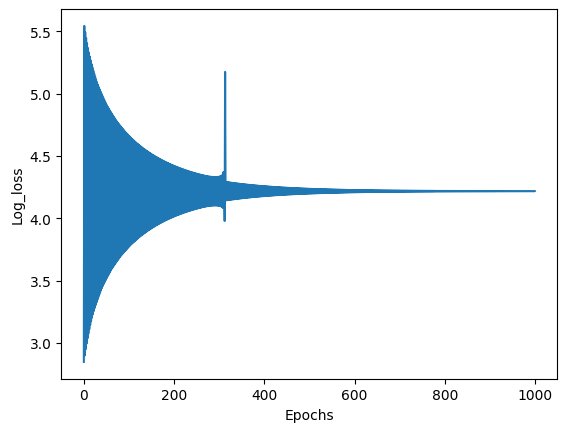

In [ ]:
ffn_moon = GenericFFNW(2,1,[2,3,2])
ffn_moon.fit(X_train,Y_train,1000,learning_rate = 0.03,display_loss = True)

In [ ]:
_threshold = 0.5
y_train_pred = ffn_moon.predict(X_train)
Y_train_norm = (y_train_pred > _threshold).astype("int").ravel()
y_pred = ffn_moon.predict(X_test)
Y_pred_norm = (y_pred > _threshold).astype("int").ravel()
train_accuracy = accuracy_score(Y_train,Y_train_norm)
test_accuracy = accuracy_score(Y_val,Y_pred_norm)
print("Training Accuracy:",train_accuracy)
print("Testing Accuracy:",test_accuracy)

Training Accuracy: 0.5
Testing Accuracy: 0.5
